In [3]:
import os
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# put image data into a numpy array
def preprocess_data(img_dir):

    images = []
    labels = []

    img_data = pd.read_csv('Data_Entry_2017_v2020.csv')

    # loop through images
    i = 1
    for img_file in tqdm(os.listdir(img_dir), desc=f"loading images"):

        # save them as numpy arrau
        img_path = os.path.join(img_dir, img_file)
        img = Image.open(img_path).convert('RGB') # 3 channels to match ImageNet


        img = tf.image.resize(img, [32, 32])

        img = tf.image.random_contrast(img, lower=0.8, upper=1.2) 
        img = tf.image.random_brightness(img, max_delta=0.2)
        img = tf.image.random_flip_left_right(img)

        # normalize the image to the range [0, 1]
        img = tf.cast(img, tf.float32) / 255.0

        # apply ImageNet normalization: (image - mean) / std
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        img = (img - mean) / std

        # add random noise
        noise = tf.random.uniform(shape=tf.shape(img), minval=0, maxval=1, dtype=tf.float32)
        img = tf.where(noise < 0.05 / 2, 0.0, tf.where(noise < 0.05, 1.0, img))

        images.append(img)

        # get label
        label = img_data.loc[img_data['Image Index'] == img_file, 'Finding Labels'].values[0]
        labels.append(label)

        i += 1

    # encode labels )numericaly
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return np.array(images), np.array(labels)

In [10]:
images, labels = preprocess_data('images')
num_classes = len(set(labels))

images = images.reshape(images.shape[0], -1).astype(float)

# split data into training and testing sets (e.g., 80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

loading images: 100%|██████████| 11700/11700 [03:53<00:00, 50.17it/s]


In [5]:
# def hyperparameter_tuning(model, params, k_folds=5):
#     k_fold = KFold(n_splits=k_folds, shuffle=True, random_state=0)
#     grid_search = GridSearchCV(estimator=model, param_grid=params, cv=k_fold, scoring='accuracy', verbose=3, n_jobs=-1)

#     grid_search.fit(x_train, y_train)

#     # Best parameters
#     print("Best Parameters:", grid_search.best_params_)
#     print("Best Score:", grid_search.best_score_)

#     return grid_search.best_params_, grid_search.best_score_

In [ ]:
# svm = SVC()

# param_grid_svm = {
#     'C': [0.1, 1, 10, 100],
#     'kernel': ['linear','poly', 'rbf']
# }

# params_svm, score_svm = hyperparameter_tuning(svm, param_grid_svm, 5)
# print(f"Best Params: {params_svm}")
# print(f"Best Score: {score_svm}")

In [ ]:
# rf = RandomForestClassifier()

# param_grid_rf = {
#     'n_estimators': [100, 200, 500, 100],
#     'max_depth': [None, 10, 20, 30]
# }

# params_rf, score_rf = hyperparameter_tuning(rf, param_grid_rf, 5)
# print(f"Best Params: {params_rf}")
# print(f"Best Score: {score_rf}")

In [ ]:
# knn = KNeighborsClassifier()

# param_grid_knn = {
#     'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15]
# }

# params_knn, score_knn = hyperparameter_tuning(knn, param_grid_knn, 5)
# print(f"Best Params: {params_knn}")
# print(f"Best Score: {score_knn}")

In [ ]:
# xgb = XGBClassifier()

# param_grid_xgb = {
#     'n_estimators': [100, 200, 500, 1000],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2]
# }

# params_xgb, score_xgb = hyperparameter_tuning(xgb, param_grid_xgb, 5)
# print(f"Best Params: {params_xgb}")
# print(f"Best Score: {score_xgb}")

In [11]:
svm = SVC()

svm.fit(x_train, y_train)

y_test_pred = svm.predict(x_test)
svm_test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", svm_test_acc)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.23803418803418802
Test Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.34      0.29       241
           1       0.26      0.23      0.25       273
           2       0.21      0.25      0.23       268
           3       0.23      0.26      0.24       254
           4       0.23      0.29      0.25       256
           5       0.18      0.07      0.10       278
           6       0.22      0.16      0.18       243
           7       0.23      0.24      0.23       258
           8       0.29      0.32      0.30       269

    accuracy                           0.24      2340
   macro avg       0.23      0.24      0.23      2340
weighted avg       0.23      0.24      0.23      2340



In [12]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_test_pred = rf.predict(x_test)
rf_test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", rf_test_acc)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.22777777777777777
Test Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.28      0.25       241
           1       0.21      0.20      0.20       273
           2       0.23      0.26      0.24       268
           3       0.26      0.32      0.29       254
           4       0.22      0.24      0.23       256
           5       0.18      0.10      0.12       278
           6       0.18      0.16      0.17       243
           7       0.23      0.24      0.24       258
           8       0.29      0.25      0.27       269

    accuracy                           0.23      2340
   macro avg       0.22      0.23      0.22      2340
weighted avg       0.22      0.23      0.22      2340



In [13]:
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

y_test_pred = knn.predict(x_test)
knn_test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", knn_test_acc)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.18247863247863247
Test Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.39      0.23       241
           1       0.17      0.21      0.19       273
           2       0.20      0.19      0.19       268
           3       0.18      0.15      0.16       254
           4       0.23      0.22      0.23       256
           5       0.18      0.12      0.14       278
           6       0.13      0.07      0.09       243
           7       0.20      0.18      0.19       258
           8       0.25      0.11      0.15       269

    accuracy                           0.18      2340
   macro avg       0.19      0.18      0.18      2340
weighted avg       0.19      0.18      0.18      2340



In [14]:
xgb = XGBClassifier()

xgb.fit(x_train, y_train)

y_test_pred = xgb.predict(x_test)
xgb_test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", xgb_test_acc)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.23333333333333334
Test Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.25      0.23       241
           1       0.25      0.27      0.26       273
           2       0.25      0.25      0.25       268
           3       0.25      0.29      0.27       254
           4       0.23      0.27      0.25       256
           5       0.20      0.13      0.16       278
           6       0.19      0.18      0.18       243
           7       0.22      0.22      0.22       258
           8       0.29      0.26      0.27       269

    accuracy                           0.23      2340
   macro avg       0.23      0.23      0.23      2340
weighted avg       0.23      0.23      0.23      2340



In [15]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

y_test_pred = lr.predict(x_test)
lr_test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", lr_test_acc)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.1858974358974359
Test Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.26      0.24       241
           1       0.21      0.20      0.20       273
           2       0.20      0.19      0.19       268
           3       0.19      0.22      0.20       254
           4       0.20      0.23      0.21       256
           5       0.09      0.08      0.08       278
           6       0.14      0.14      0.14       243
           7       0.21      0.20      0.20       258
           8       0.20      0.18      0.19       269

    accuracy                           0.19      2340
   macro avg       0.18      0.19      0.18      2340
weighted avg       0.18      0.19      0.18      2340



/opt/anaconda3/envs/MATH452/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
nb = GaussianNB()

nb.fit(x_train, y_train)

y_test_pred = nb.predict(x_test)
nb_test_acc = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", nb_test_acc)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.20384615384615384
Test Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.44      0.27       241
           1       0.20      0.19      0.20       273
           2       0.21      0.35      0.26       268
           3       0.19      0.16      0.17       254
           4       0.21      0.21      0.21       256
           5       0.24      0.02      0.04       278
           6       0.13      0.03      0.05       243
           7       0.22      0.20      0.21       258
           8       0.21      0.26      0.23       269

    accuracy                           0.20      2340
   macro avg       0.20      0.21      0.18      2340
weighted avg       0.20      0.20      0.18      2340



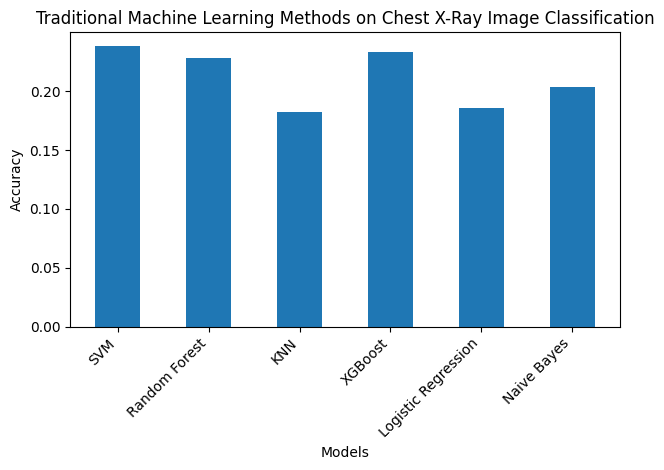

In [17]:
categories = ['SVM', 'Random Forest', 'KNN', 'XGBoost', 'Logistic Regression', 'Naive Bayes']
test_accuracies = [svm_test_acc, rf_test_acc, knn_test_acc, xgb_test_acc, lr_test_acc, nb_test_acc]

bar_width = 0.5
index = np.arange(len(categories))

plt.bar(index, test_accuracies, bar_width, label='Test')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Traditional Machine Learning Methods on Chest X-Ray Image Classification')
plt.xticks(index, categories, rotation=45, ha='right', va='top')
plt.tight_layout()
plt.show()
